## Introduction

### Contexte : 

On souhaite entrainé l' IA à prédire le salaire des employés. 

Les colonnes étudiées sont : 

**Age** : L'age des employé(e)s \
**Gender** : Le genre des employé(e)s \
**Education Level** : Le niveau d'étude des employé(e)s \
**Job Title** : Le nom du job des employé(e)s \
**Years of Experience** : Les années d'expérience des employé(e)s \
**Salary** : Le salaire annuel des employé(e)s 

Les données peuvent être trouvées sur Kaggle : https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer \
Le nom du fichier à récupérer est : **Salary Data.csv**

C'est un problème de **régression**.
Pour le résoudre nous allons : 
1. Analyser les données
2. Nettoyer les données 
3. Modéliser les données
4. Entrainer les données
5. Conclusion

Comme nous avons des **données numériques** on va utiliser les algorithmes suivants :
1. Régression Linéaire

2. Gradient Boosting

3. Random Forest

4. Régression Ridge

5. Régression Lasso

## Analyse des données

###  1. Importer les librairies nécessaires

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### 2. Charger les données dans un DataFrame

In [35]:
df = pd.read_csv("SalaryData.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### 3. Vérifier les doublons

In [36]:
df.duplicated().sum()

50

#### Vérifier les valeurs nulles


In [37]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

### 5. Informations du DataFrame

In [38]:
# Vérifier les infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


### 6. Descriptif du DataFrame

In [39]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


 ### 7. Divers graphiques à propos du salaire

In [40]:
# Les salaires > 190k 
df.loc[(df.Salary > 190000)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
4,52.0,Male,Master's,Director,20.0,200000.0
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
53,47.0,Male,Master's,VP of Finance,19.0,200000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0


<Axes: xlabel='Age'>

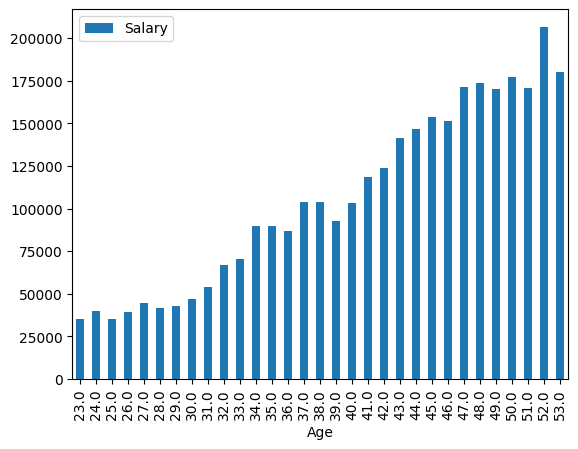

In [41]:
Age = pd.DataFrame(df.groupby('Age')['Salary'].mean())
Age.plot.bar()

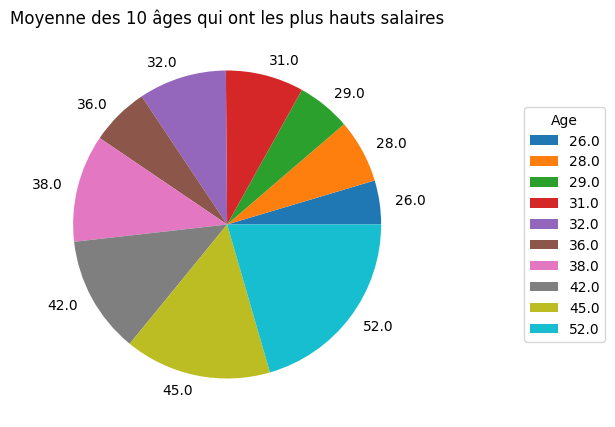

In [42]:
df_age = df.sort_values(by='Salary', ascending=False)
df_age = df.head(10)
df_age = df_age.groupby('Age')['Salary'].mean()
fig= plt.subplots(figsize=(8, 5))
plt.pie(df_age, labels=df_age.index)
plt.legend(title="Age", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Moyenne des 10 âges qui ont les plus hauts salaires')
plt.show()

#### Nous remarquons que les salariés qui ont 52 ans ont le salaire le plus importants

<Axes: xlabel='Years of Experience'>

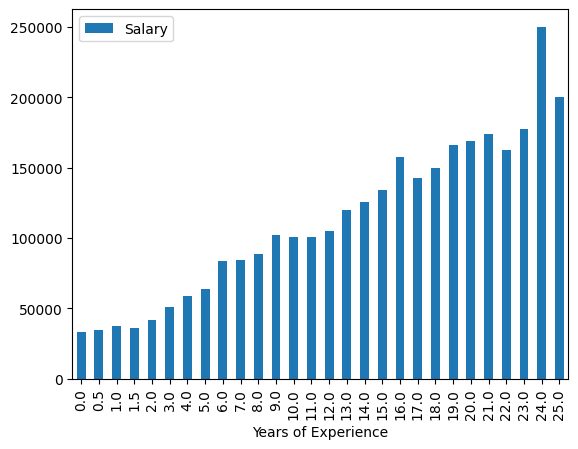

In [43]:
Experience = pd.DataFrame(df.groupby('Years of Experience')['Salary'].mean())
Experience.plot.bar()

#### Les personnes qui ont 24 ans d'experiences ont les salaires les plus élevés 

<Axes: xlabel='Education Level'>

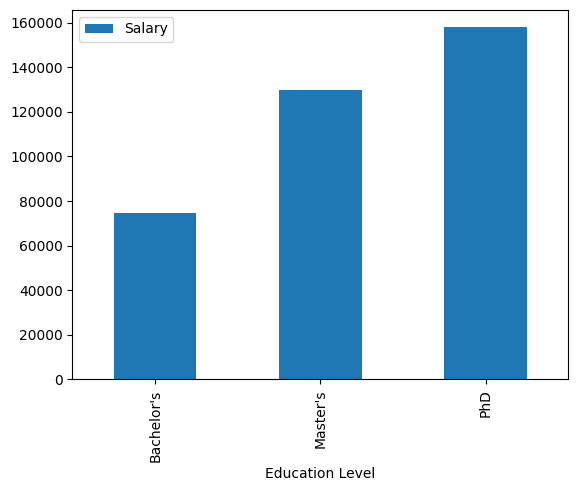

In [44]:
Level = pd.DataFrame(df.groupby('Education Level')['Salary'].mean())
Level.plot.bar()

#### Nous constatons que les doctorants ont les salaires les plus élevés

<Axes: xlabel='Job Title'>

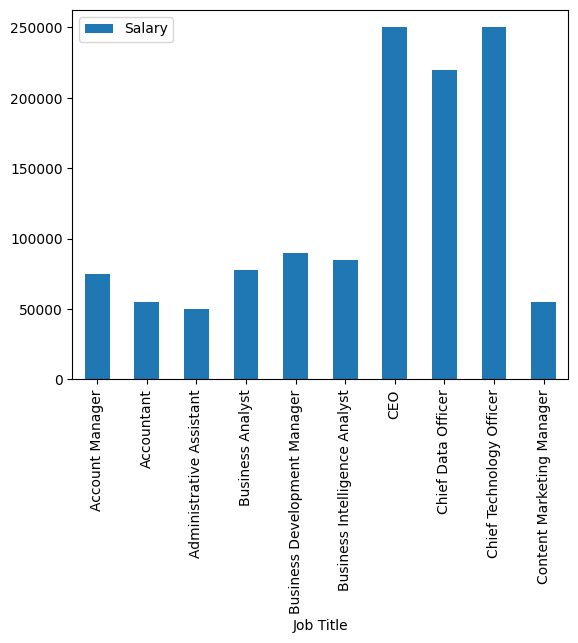

In [45]:
jobTitle = pd.DataFrame(df.groupby('Job Title')['Salary'].mean())
jobTitle.head(10).plot.bar()

####  Nous constatons les CEO et les Chief Technology Officer ont les salaires les plus importants.

## Nettoyage des données

### 1. Supprimer les doublons

In [48]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### 2. Supprimer les valeurs nulles

In [49]:
df.dropna(inplace=True)
df.isnull().sum()

C:\Users\mrcut\AppData\Local\Temp\ipykernel_21512\3641017954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

### 3. Encoder les colonnes Gender, Education Level et Job Title

In [50]:
gender = LabelEncoder()
df['Gender']=gender.fit_transform(df['Gender'])

education_lvl = LabelEncoder()
df['Education Level'] = education_lvl.fit_transform(df['Education Level'])

job = LabelEncoder()
df['Job Title']=job.fit_transform(df['Job Title'])

df.head()

C:\Users\mrcut\AppData\Local\Temp\ipykernel_21512\2993473909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=gender.fit_transform(df['Gender'])
C:\Users\mrcut\AppData\Local\Temp\ipykernel_21512\2993473909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = education_lvl.fit_transform(df['Education Level'])
C:\Users\mrcut\AppData\Local\Temp\ipykernel_21512\2993473909.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


### 4. Bilan du Feature Engineering

Les valeurs en **doublons** et **nulles** ont été **supprimées** \
Les colonnes **Gender** , **Education Level** et **Job Title** ont été encodés pour le traitement.

## Modélisation des données


### 1. Corrélation entre le salaire et l'âge

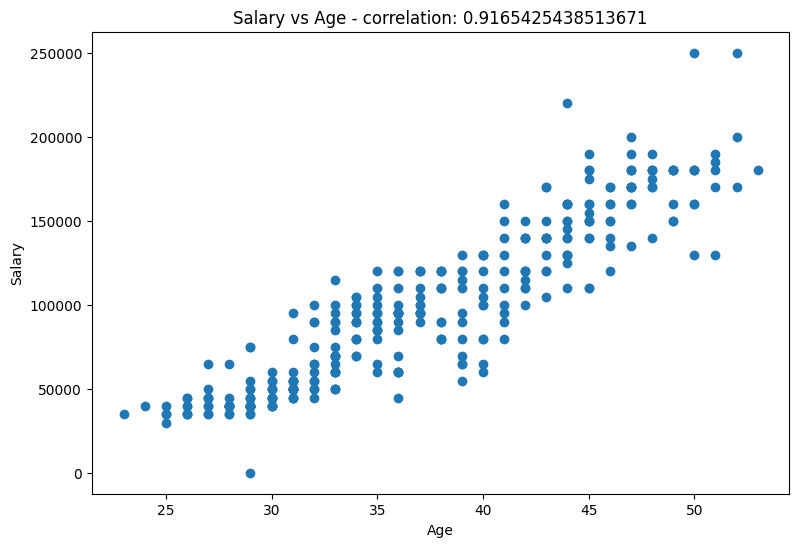

In [51]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Age']
label = df['Salary']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Age')
plt.ylabel('Salary')
ax.set_title('Salary vs Age - correlation: ' + str(correlation))
plt.show()

### 2. Corrélation entre le salaire et le genre

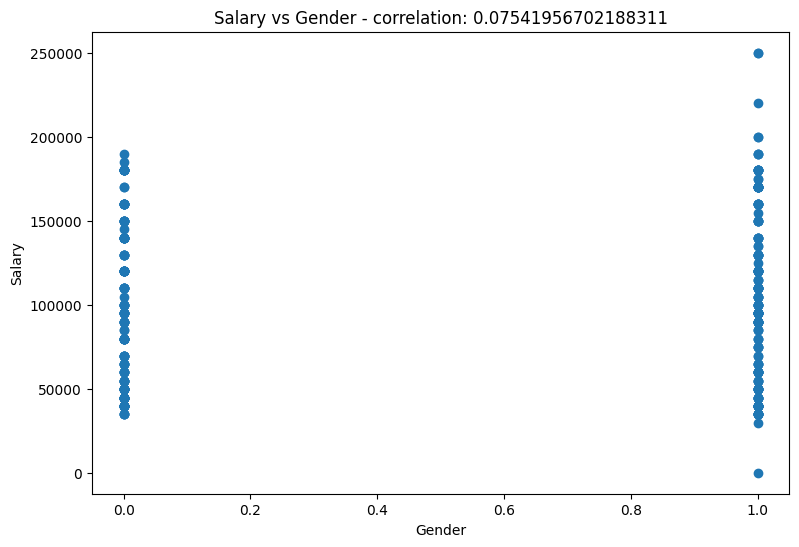

In [52]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Gender']
label = df['Salary']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Gender')
plt.ylabel('Salary')
ax.set_title('Salary vs Gender - correlation: ' + str(correlation))
plt.show()

on observe une equivalence entre les salaires des hommes et des femmes, on peut supposer que cette variable affecte que tres peu la variable salary

### 3. Corrélation entre le salaire et le niveau d'étude

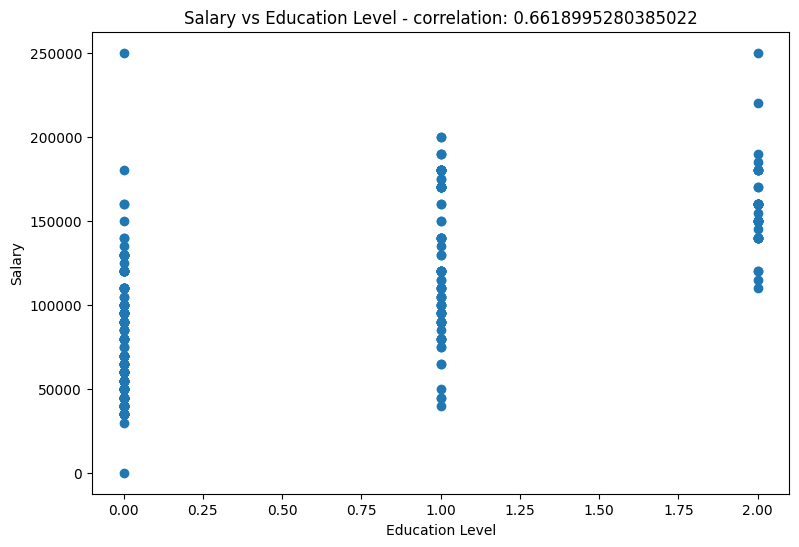

In [53]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Education Level']
label = df['Salary']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Education Level')
plt.ylabel('Salary')
ax.set_title('Salary vs Education Level - correlation: ' + str(correlation))
plt.show()

### 4. Corrélation entre le salaire et le job

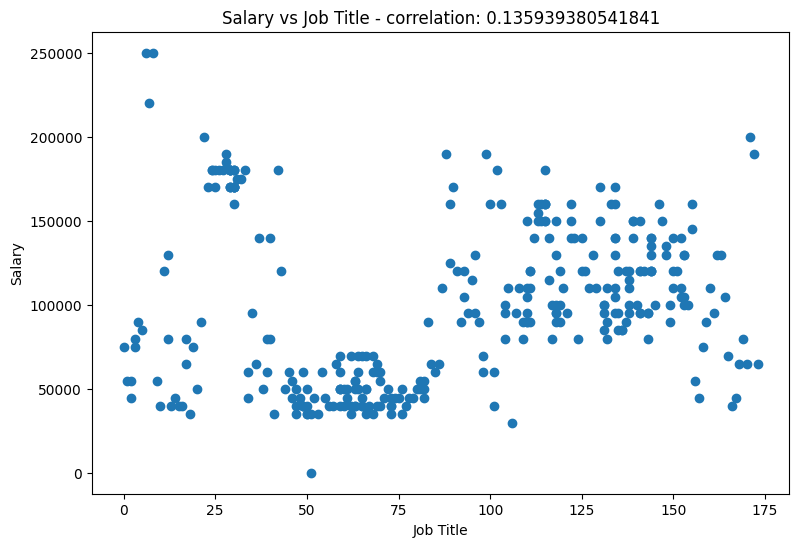

In [54]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Job Title']
label = df['Salary']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Job Title')
plt.ylabel('Salary')
ax.set_title('Salary vs Job Title - correlation: ' + str(correlation))
plt.show()

### 5. Corrélation entre le salaire et les années d'expériences

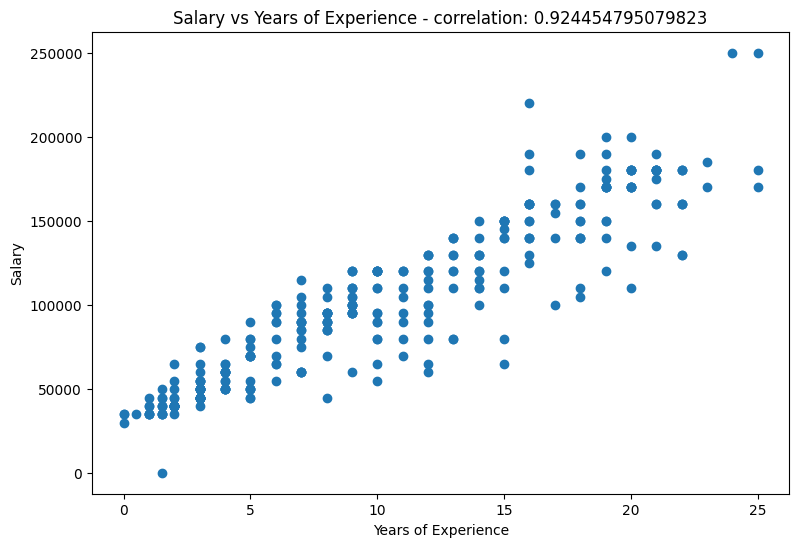

In [55]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Years of Experience']
label = df['Salary']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
ax.set_title('Salary vs Years of Experience - correlation: ' + str(correlation))
plt.show()

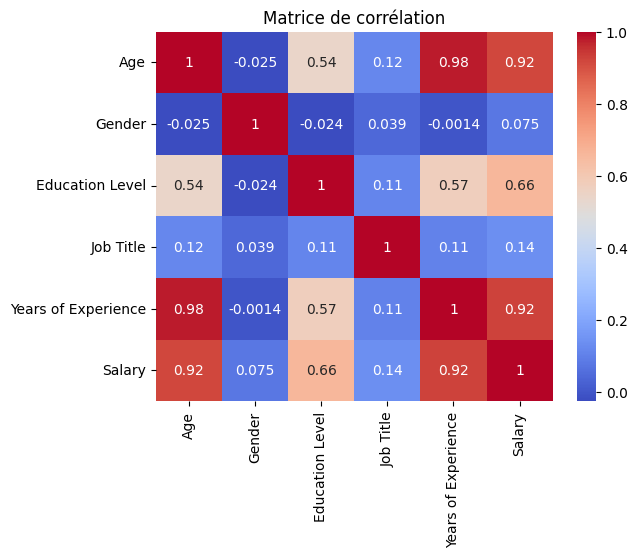

In [56]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title("Matrice de corrélation")
plt.show()

La correlation de Gender et de Job title atteint presque le negatif, ce qui montre que ces deux variables ont une faible influence sur la variable salary.

## Entrainement et optimisation des résultats

### 1. Séparation des features et labels dans 2 variables X et Y 

In [57]:
X = df[['Age','Years of Experience', 'Education Level','Job Title',]]
Y = df['Salary']

### 2. Séparation des données :  75% pour l'entraînement,  25% pour le test

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### 3. Régression Linéaire

In [59]:
model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
r2_score(predictions, Y_test)

0.891917656480397

### 4. Gradient Boosting

In [60]:
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
          
predictions = model.predict(X_test)
r2_score(predictions, Y_test)

0.9160312208496332

### 5. Random Forest

In [61]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
r2_score(predictions, Y_test)

0.9116265992604199

### 6. Régression Ridge

In [62]:
model = Ridge(alpha=1.0, random_state=42)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
r2_score(predictions, Y_test)

0.8921628523709785

### 7. Régression Lasso

In [63]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0, random_state=42)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
r2_score(predictions, Y_test)

0.8919219302562846

## Présentation des résultats

On obtient des scores très satisfaisants (Entre 0.90 et 0.93)

On remarque que toutes les features ne sont pas importantes pour prédire le salaire.

